## Data Mining and Machine Learning
## Linear Regression and Correlation 
### Edgar Acuna
#### Febrero 2019

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns
import statsmodels.formula.api as sm
import plotnine
from plotnine import *
%matplotlib inline

### Example 1: Predicting number of cars sold according to the seller's year of experience 

In [82]:
years=[3,4,6,7,8,12,15,20,22,26]
ventas=[9,12,16,19,23,27,34,37,40,45]

Drawing the scatterplot

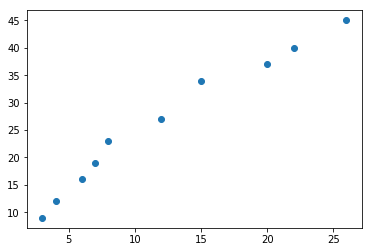

In [83]:
#Haciendo el scatterplot
plt.scatter(years,ventas)

Finding the correlation using numpy

In [84]:
#Hallando la correlacion usando numpy
np.corrcoef(years,ventas)[0][1]

0.9835928893659417

Comentario: Muy buena relacion lineal entre years y ventas. Cuando los anos de experiencia aumentan, las ventas tienden a aumentar

Finding the coefficients of the regression Line using numpy

In [85]:
#Hallando los coeficentes de la linea de regresion usando numpy
intercepto, slope= np.poly1d(np.polyfit(years, ventas, 1))
print(intercepto, slope)

1.5072021691238777 7.661413319776308


In [86]:
#Preparando el dataframe para usar pandas
data=[years,ventas]
data=np.transpose(data)
df=pd.DataFrame(data,columns=['years','ventas'])
df

,years,ventas
0,3,9
1,4,12
2,6,16
3,7,19
4,8,23
5,12,27
6,15,34
7,20,37
8,22,40
9,26,45


In [87]:
#Calculando la correlacion con pandas
df.corr()["years"]["ventas"]

0.9835928893659418

Nota: Pandas no hacer regresion lineal

Finding correlation and regression using scipy.stats

In [88]:
#usando stats de scipy muestra la correlacion y su p-value
stats.pearsonr(years,ventas)

(0.9835928893659419, 3.108350979394446e-07)

In [89]:
ec=stats.linregress(years,ventas)
print('slope=', ec[0], 'intercepto=', ec[1])

slope= 1.5072021691238775 intercepto= 7.661413319776305


In [90]:
# Hallando la regresion con statmodels
result = sm.ols(formula="ventas ~ years", data=df).fit()
print(result.params)

Intercept    7.661413
years        1.507202
dtype: float64


In [91]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           3.11e-07
Time:                        20:13:23   Log-Likelihood:                -21.720
No. Observations:                  10   AIC:                             47.44
Df Residuals:                       8   BIC:                             48.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6614      1.417      5.405      0.0

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


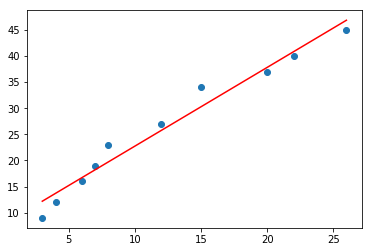

In [92]:
#Trazando la linea de regresion sobre el plot de puntos
x=years
y=ventas
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()

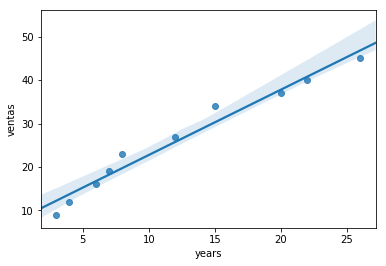

In [93]:
sns.regplot(x='years',y='ventas',data=df)

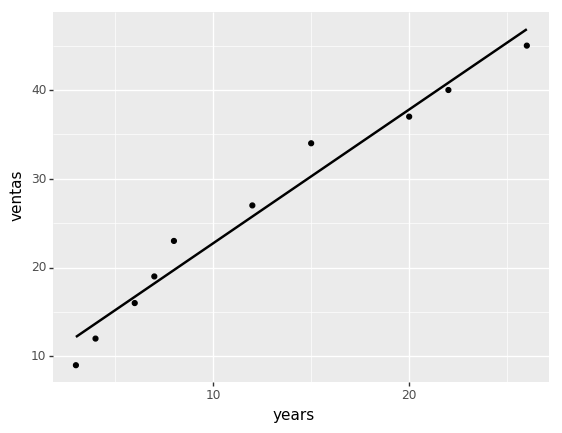

<ggplot: (-9223371873034874841)>

In [94]:
#usando ggplot con la libreria plotnine
(ggplot(df, aes(x='years',y='ventas'))+geom_point()+geom_smooth(method="lm",se=False))

In [95]:
#Hallando los resultados completos de la regresion de ventas versus years
result = sm.ols(formula="ventas ~ years", data=df).fit()
print(result.params)

Intercept    7.661413
years        1.507202
dtype: float64


In [96]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     237.8
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           3.11e-07
Time:                        20:13:23   Log-Likelihood:                -21.720
No. Observations:                  10   AIC:                             47.44
Df Residuals:                       8   BIC:                             48.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6614      1.417      5.405      0.0

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### Example 2:  Predicting price of houses according to the area

In [97]:
#Ejemplo 2
df = pd.read_csv('http://academic.uprm.edu/eacuna/casas.txt',sep='\s+')
df.head()

,area,precio
0,3060,179000
1,1600,126500
2,2000,134500
3,1300,125000
4,2000,142000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
area      15 non-null int64
precio    15 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes


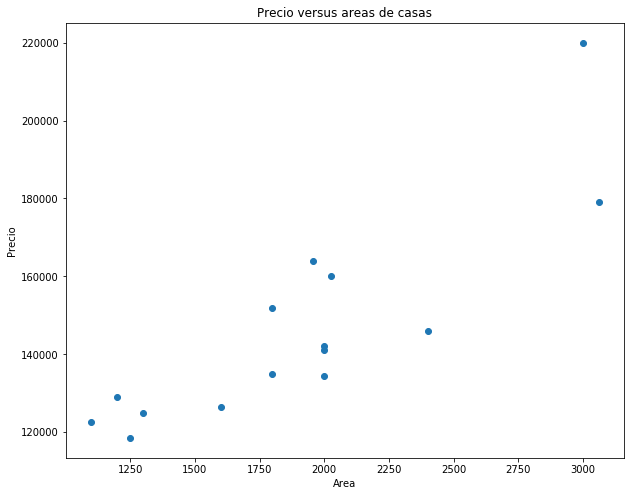

In [99]:
# Haciendp el scatterplot
plt.figure(figsize=(10,8))
# Create a scatterplOT
plt.scatter(df['area'], df['precio'])
# Chart title
plt.title('Precio versus areas de casas')
# y label
plt.ylabel('Precio')
# x label
plt.xlabel('Area')
plt.show()

In [100]:
# Hallando la correlacion
df.corr()['area']['precio']

0.8581799244743272

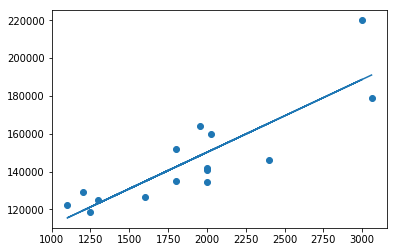

In [101]:
#Trazando la linea de regresion junto con los data points
x=df['area']
y=df['precio']
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))

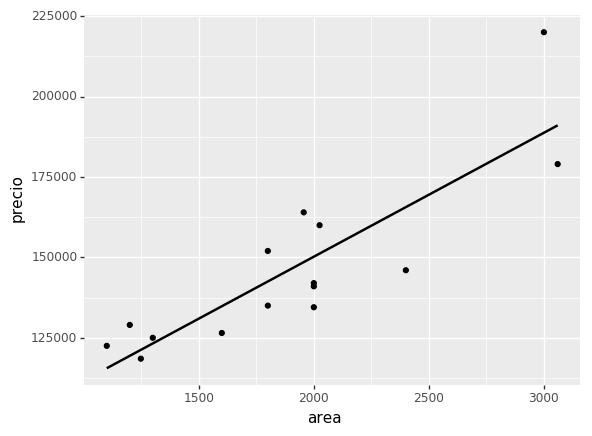

<ggplot: (-9223371873034980664)>

In [102]:
#usando ggplot con la libreria plotnine
(ggplot(df, aes(x='area',y='precio'))+geom_point()+geom_smooth(method="lm",se=False))

In [103]:
#Hallando los resultados completos de la regresion de precio versus area
result = sm.ols(formula="precio ~ area", data=df).fit()
print(result.params)
print(result.summary())

Intercept    73167.748381
area            38.523071
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     36.33
Date:                Sat, 02 Feb 2019   Prob (F-statistic):           4.25e-05
Time:                        20:13:25   Log-Likelihood:                -163.54
No. Observations:                  15   AIC:                             331.1
Df Residuals:                      13   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
